In [ ]:
#SOURCE https://github.com/JimP315/Machine-Learning-Trading/blob/main/machine_learning_trading_bot.ipynb

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [7]:
tsla_data = pd.read_csv(
    Path("../resources/technical_indicator_data.csv"),
    index_col="Date",
    parse_dates=True, 
    infer_datetime_format=True
)

tsla_data


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,SMA_Signal,SMA_Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,BB_Signal,BB_Entry/Exit,EMA50,EMA100,EMA_Signal,EMA_Entry/Exit
Date,,,,,,,,,,,,,,,,,,,
2017-06-05,67.699997,69.688004,66.842003,69.463997,69.463997,33922000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,69.463997,69.463997,0.0,NaN
2017-06-06,68.940002,71.898003,67.994003,70.570000,70.570000,55434000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,70.028058,70.022528,0.0,0.0
2017-06-07,71.267998,72.099998,71.028000,71.930000,71.930000,46990000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,70.687564,70.671111,0.0,0.0
2017-06-08,72.750000,74.379997,72.043999,74.000000,74.000000,45307500,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,71.566008,71.528464,0.0,0.0
2017-06-09,74.884003,75.374001,70.959999,71.463997,71.463997,86307000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,71.543942,71.515050,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29765000,909.515197,908.520997,1.0,1.0,949.794758,766.040500,582.286241,0.0,0.0,844.711211,885.825845,0.0,0.0
2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500,906.572596,905.222397,1.0,0.0,930.889209,758.806500,586.723792,0.0,0.0,841.320968,883.299789,0.0,0.0
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300,902.956797,901.979097,1.0,0.0,907.266637,750.362500,593.458363,0.0,0.0,837.362106,880.469496,0.0,0.0


In [8]:

# Use the pct_change function to generate  returns from close prices
tsla_data["Actual Returns"] = tsla_data["Close"].pct_change()

# Drop all NaN values from the DataFrame
tsla_data = tsla_data.dropna()

# Review the DataFrame
display(tsla_data.head())
display(tsla_data.tail())

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,SMA_Signal,SMA_Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,BB_Signal,BB_Entry/Exit,EMA50,EMA100,EMA_Signal,EMA_Entry/Exit,Actual Returns
Date,,,,,,,,,,,,,,,,,,,,
2017-10-24,67.760002,68.559998,67.232002,67.468002,67.468002,22458500,70.70144,70.25874,1.0,1.0,72.808757,69.8021,66.795442,0.0,0.0,70.317330,70.281730,1.0,0.0,0.000950
2017-10-25,67.339996,67.500000,64.711998,65.167999,65.167999,42970500,70.55548,70.21578,1.0,0.0,73.245269,69.6508,66.056330,1.0,1.0,70.111780,70.164982,0.0,-1.0,-0.034090
2017-10-26,65.556000,66.045998,64.639999,65.234001,65.234001,25117500,70.40852,70.16242,1.0,0.0,73.556373,69.5165,65.476627,1.0,0.0,69.917207,70.052746,0.0,0.0,0.001013
2017-10-27,63.950001,64.917999,63.332001,64.174004,64.174004,34898500,70.28432,70.08486,1.0,0.0,73.983598,69.3142,64.644802,1.0,0.0,69.688266,69.919332,0.0,0.0,-0.016249
2017-10-30,63.835999,64.755997,63.450001,64.015999,64.015999,21272000,70.17480,69.98502,1.0,0.0,74.325140,69.0997,63.874259,0.0,-1.0,69.462299,69.785747,0.0,0.0,-0.002462


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,SMA_Signal,SMA_Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,BB_Signal,BB_Entry/Exit,EMA50,EMA100,EMA_Signal,EMA_Entry/Exit,Actual Returns
Date,,,,,,,,,,,,,,,,,,,,
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29765000,909.515197,908.520997,1.0,1.0,949.794758,766.040500,582.286241,0.0,0.0,844.711211,885.825845,0.0,0.0,0.073333
2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500,906.572596,905.222397,1.0,0.0,930.889209,758.806500,586.723792,0.0,0.0,841.320968,883.299789,0.0,0.0,-0.001804
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300,902.956797,901.979097,1.0,0.0,907.266637,750.362500,593.458363,0.0,0.0,837.362106,880.469496,0.0,0.0,-0.023594
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700,898.577197,899.459498,0.0,-1.0,867.188999,741.481500,615.774002,0.0,0.0,834.916533,878.380991,0.0,0.0,0.046774
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100,892.665997,895.913798,0.0,0.0,843.199416,732.994998,622.790580,0.0,0.0,829.764904,874.918991,0.0,0.0,-0.092194


In [9]:
# Calculate the strategy returns and add them to the signals_df DataFrame
tsla_data['Strategy Returns'] = tsla_data["Actual Returns"] * tsla_data['SMA_Signal'].shift()

# Review the DataFrame
display(tsla_data.head())
display(tsla_data.tail())

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,SMA_Signal,SMA_Entry/Exit,...,BB_MIDDLE,BB_LOWER,BB_Signal,BB_Entry/Exit,EMA50,EMA100,EMA_Signal,EMA_Entry/Exit,Actual Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-24,67.760002,68.559998,67.232002,67.468002,67.468002,22458500,70.70144,70.25874,1.0,1.0,...,69.8021,66.795442,0.0,0.0,70.317330,70.281730,1.0,0.0,0.000950,NaN
2017-10-25,67.339996,67.500000,64.711998,65.167999,65.167999,42970500,70.55548,70.21578,1.0,0.0,...,69.6508,66.056330,1.0,1.0,70.111780,70.164982,0.0,-1.0,-0.034090,-0.034090
2017-10-26,65.556000,66.045998,64.639999,65.234001,65.234001,25117500,70.40852,70.16242,1.0,0.0,...,69.5165,65.476627,1.0,0.0,69.917207,70.052746,0.0,0.0,0.001013,0.001013
2017-10-27,63.950001,64.917999,63.332001,64.174004,64.174004,34898500,70.28432,70.08486,1.0,0.0,...,69.3142,64.644802,1.0,0.0,69.688266,69.919332,0.0,0.0,-0.016249,-0.016249
2017-10-30,63.835999,64.755997,63.450001,64.015999,64.015999,21272000,70.17480,69.98502,1.0,0.0,...,69.0997,63.874259,0.0,-1.0,69.462299,69.785747,0.0,0.0,-0.002462,-0.002462


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100,SMA_Signal,SMA_Entry/Exit,...,BB_MIDDLE,BB_LOWER,BB_Signal,BB_Entry/Exit,EMA50,EMA100,EMA_Signal,EMA_Entry/Exit,Actual Returns,Strategy Returns
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29765000,909.515197,908.520997,1.0,1.0,...,766.040500,582.286241,0.0,0.0,844.711211,885.825845,0.0,0.0,0.073333,0.000000
2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500,906.572596,905.222397,1.0,0.0,...,758.806500,586.723792,0.0,0.0,841.320968,883.299789,0.0,0.0,-0.001804,-0.001804
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300,902.956797,901.979097,1.0,0.0,...,750.362500,593.458363,0.0,0.0,837.362106,880.469496,0.0,0.0,-0.023594,-0.023594
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700,898.577197,899.459498,0.0,-1.0,...,741.481500,615.774002,0.0,0.0,834.916533,878.380991,0.0,0.0,0.046774,0.046774
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100,892.665997,895.913798,0.0,0.0,...,732.994998,622.790580,0.0,0.0,829.764904,874.918991,0.0,0.0,-0.092194,-0.000000


<AxesSubplot:xlabel='Date'>

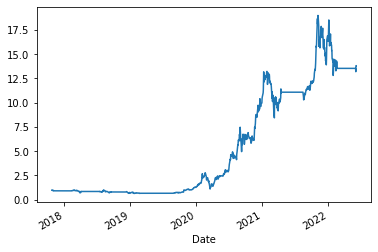

In [10]:
# Plot Strategy Returns to examine performance
(1 + tsla_data['Strategy Returns']).cumprod().plot()

In [11]:
plt.savefig("Strategy Return plot")

<Figure size 432x288 with 0 Axes>

# Split the data into training and testing datasets

In [12]:
# Assign a copy of the SMA100 and SMA50 columns to a features DataFrame called X
X = tsla_data[['SMA100', 'SMA50']].shift().dropna()

# Review the DataFrame
X.head()

,SMA100,SMA50
Date,,
2017-10-25,70.25874,70.70144
2017-10-26,70.21578,70.55548
2017-10-27,70.16242,70.40852
2017-10-30,70.08486,70.28432
2017-10-31,69.98502,70.17480


In [13]:
# Create the target set selecting the Signal column and assiging it to y
y = tsla_data['SMA_Signal']

# Review the value counts
y.value_counts()

1.0    698
0.0    463
Name: SMA_Signal, dtype: int64

In [14]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-10-25 00:00:00


In [15]:
# Select the ending period for the training data with an offset of 12 months
training_end = X.index.min() + DateOffset(months=12)

# Display the training end date
print(training_end)

2018-10-25 00:00:00


In [16]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.tail()

,SMA100,SMA50
Date,,
2018-10-19,62.21938,59.37484
2018-10-22,62.15594,59.00504
2018-10-23,62.10838,58.62688
2018-10-24,62.11302,58.37780
2018-10-25,62.09654,58.14124


In [17]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA100,SMA50
Date,,
2017-10-25,70.25874,70.70144
2017-10-26,70.21578,70.55548
2017-10-27,70.16242,70.40852
2017-10-30,70.08486,70.28432
2017-10-31,69.98502,70.17480


In [18]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Use SVC classifier model from SKLearn suport vector machine SVM learning method to fit the training data and make predictions 

In [19]:

# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_train_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Review the classification report associated with the SVC model predictions 

In [20]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_train, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       153
         1.0       0.98      0.96      0.97       100

    accuracy                           0.98       253
   macro avg       0.98      0.97      0.98       253
weighted avg       0.98      0.98      0.98       253



# Create a predictions dataframe that contains columns for predicted values, actual returns and strategy returns 

In [23]:
# Create a new empty predictions DataFrame.
testing_signal_predictions = svm_model.predict(X_test_scaled)
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = tsla_data['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-10-26,0.0,0.050943,0.0
2018-10-29,0.0,0.011937,0.0
2018-10-30,0.0,-0.014783,-0.0
2018-10-31,0.0,0.022492,0.0
2018-11-01,0.0,0.020633,0.0


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-05-27,1.0,0.073333,0.073333
2022-05-31,1.0,-0.001804,-0.001804
2022-06-01,1.0,-0.023594,-0.023594
2022-06-02,1.0,0.046774,0.046774
2022-06-03,1.0,-0.092194,-0.092194


# Create a cumulative return plot that shows the actual returns vs. the strategy returns. 

,Actual Returns,Strategy Returns
Date,,
2018-10-26,1.050943,1.000000
2018-10-29,1.011937,1.000000
2018-10-30,0.985217,1.000000
2018-10-31,1.022492,1.000000
2018-11-01,1.020633,1.000000
...,...,...
2022-05-27,1.073333,1.073333
2022-05-31,0.998196,0.998196
2022-06-01,0.976406,0.976406


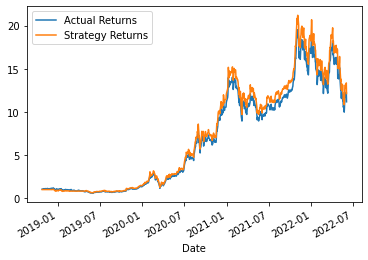

In [24]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
(1 + predictions_df[["Actual Returns", "Strategy Returns"]])

In [25]:
plt.savefig("CumulativeReturnplot12mthoffset.png")

<Figure size 432x288 with 0 Axes>

# Evaluate Machine Learning Classifier

In [26]:
# Import a new classifier from SKLearn
from sklearn.ensemble import RandomForestClassifier

# Initiate the model instance
RF_model = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)

RF_model 

RandomForestClassifier(n_estimators=10, random_state=0)

# using the original training data as baseline model, fit another model with the new classifier

In [27]:
# Fit the model using the training data
RF_model = RF_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
RF_model_predictions = RF_model.predict(X_train_scaled)

# Review the model's predicted values
RF_model_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# back test the new model to evaluate performance 

In [28]:
# Use a classification report to evaluate the model using the predictions and testing data
RF_training_report = classification_report(y_test, testing_signal_predictions)

# Print the classification report
print(RF_training_report)

              precision    recall  f1-score   support

         0.0       0.97      0.23      0.37       310
         1.0       0.71      1.00      0.83       597

    accuracy                           0.73       907
   macro avg       0.84      0.61      0.60       907
weighted avg       0.80      0.73      0.67       907



In [29]:
# Create a new empty predictions DataFrame.
testing_signal_predictions = RF_model.predict(X_test_scaled)
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = tsla_data['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-10-26,0.0,0.050943,0.0
2018-10-29,0.0,0.011937,0.0
2018-10-30,0.0,-0.014783,-0.0
2018-10-31,0.0,0.022492,0.0
2018-11-01,0.0,0.020633,0.0


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-05-27,1.0,0.073333,0.073333
2022-05-31,1.0,-0.001804,-0.001804
2022-06-01,1.0,-0.023594,-0.023594
2022-06-02,1.0,0.046774,0.046774
2022-06-03,1.0,-0.092194,-0.092194


<AxesSubplot:xlabel='Date'>

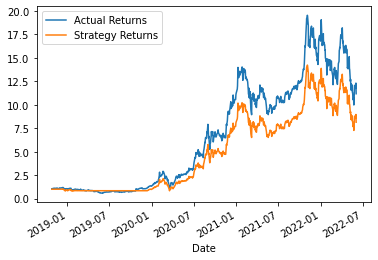

In [30]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

In [31]:
plt.savefig("RF Prediction - 12mth Offset")

<Figure size 432x288 with 0 Axes>

In [32]:
# Now we will look at AdaBoostClassifier as a comparison supervised learning moduel 
# Import a new classifier from SKLearn

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

In [33]:
ada_model = AdaBoostClassifier(n_estimators=100)

ada_model 

AdaBoostClassifier(n_estimators=100)

In [34]:
ada_model = ada_model.fit(X_train_scaled, y_train)
ada_model_predictions = ada_model.predict(X_train_scaled)
# Review the model's predicted values
ada_model_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
# Use a classification report to evaluate the model using the predictions and testing data
ada_training_report = classification_report(y_test, testing_signal_predictions)

# Print the classification report
print(ada_training_report)

              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55       310
         1.0       0.76      0.85      0.81       597

    accuracy                           0.73       907
   macro avg       0.70      0.67      0.68       907
weighted avg       0.72      0.73      0.72       907



In [38]:
# Create a new empty predictions DataFrame.
testing_signal_predictions = ada_model.predict(X_test_scaled)
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the ADA boost model predictions to the DataFrame
predictions_df['Predicted'] = testing_signal_predictions

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = tsla_data['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-10-26,0.0,0.050943,0.0
2018-10-29,0.0,0.011937,0.0
2018-10-30,0.0,-0.014783,-0.0
2018-10-31,0.0,0.022492,0.0
2018-11-01,0.0,0.020633,0.0


,Predicted,Actual Returns,Strategy Returns
Date,,,
2022-05-27,1.0,0.073333,0.073333
2022-05-31,1.0,-0.001804,-0.001804
2022-06-01,1.0,-0.023594,-0.023594
2022-06-02,1.0,0.046774,0.046774
2022-06-03,1.0,-0.092194,-0.092194


<AxesSubplot:xlabel='Date'>

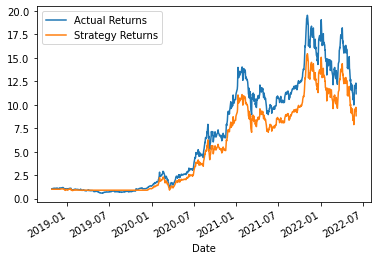

In [39]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

In [40]:
plt.savefig("ADA Boost Prediction 12mth Offset")

<Figure size 432x288 with 0 Axes>